In [34]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [37]:
df=pd.read_csv('creditcard.csv')

In [38]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df['normalizedAmount'] = sc.fit_transform(df['Amount'].values.reshape(-1,1))
df = df.drop(['Amount'], axis = 1)
df = df.drop(['Time'], axis = 1)

In [41]:
df.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [42]:
df.shape

(284807, 30)

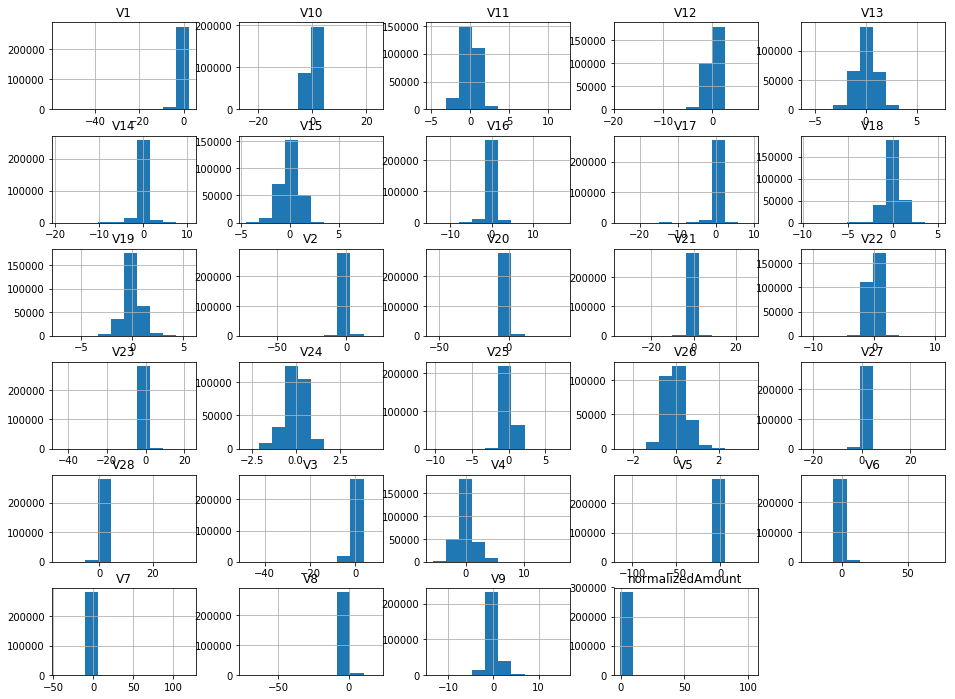

In [43]:
plt.rcParams['figure.figsize']=(16,12)
df.drop(['Class'],axis=1).hist();

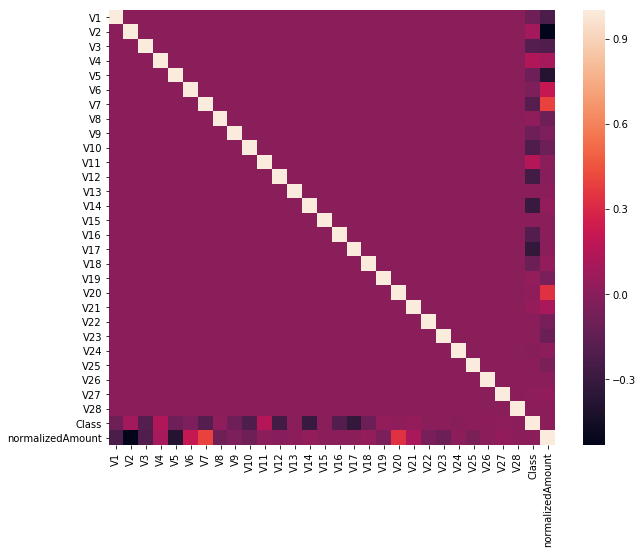

In [44]:
plt.rcParams['figure.figsize']=(10,8)
sns.heatmap(df.corr());

In [45]:
df['Class'].nunique()

2

In [46]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [47]:
df['Class'].value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

In [48]:
X = df.iloc[:, df.columns != 'Class'].values
y = df.iloc[:, df.columns == 'Class'].values

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state = 101)

In [50]:
X_train.shape

(227845, 29)

In [51]:
X_test.shape

(56962, 29)

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
forest = RandomForestClassifier(n_estimators=100)

In [54]:
forest.fit(X_train, y_train)

C:\Users\Sachin Kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [55]:
forest_pred_probs=forest.predict_proba(X_test)[:,1]

In [56]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_auc_score

In [58]:
roc_auc_score(y_test, forest_pred_probs)

0.9451691691096883

In [59]:
accuracy_score(y_test, forest_pred_probs>0.4)

0.9995786664794073

In [60]:
y_test.shape

(56962, 1)

In [61]:
precision_score(y_test, forest_pred_probs>0.4)

0.9247311827956989

In [62]:
recall_score(y_test, forest_pred_probs>0.4)

0.8349514563106796

In [63]:
from sklearn.metrics import classification_report

In [64]:
print(classification_report(y_test, forest_pred_probs>0.4))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56859
           1       0.92      0.83      0.88       103

   micro avg       1.00      1.00      1.00     56962
   macro avg       0.96      0.92      0.94     56962
weighted avg       1.00      1.00      1.00     56962



In [65]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score,auc

In [66]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, forest_pred_probs>0.4)
roc_auc = auc(false_positive_rate, true_positive_rate)
print (roc_auc)

0.917414172377011


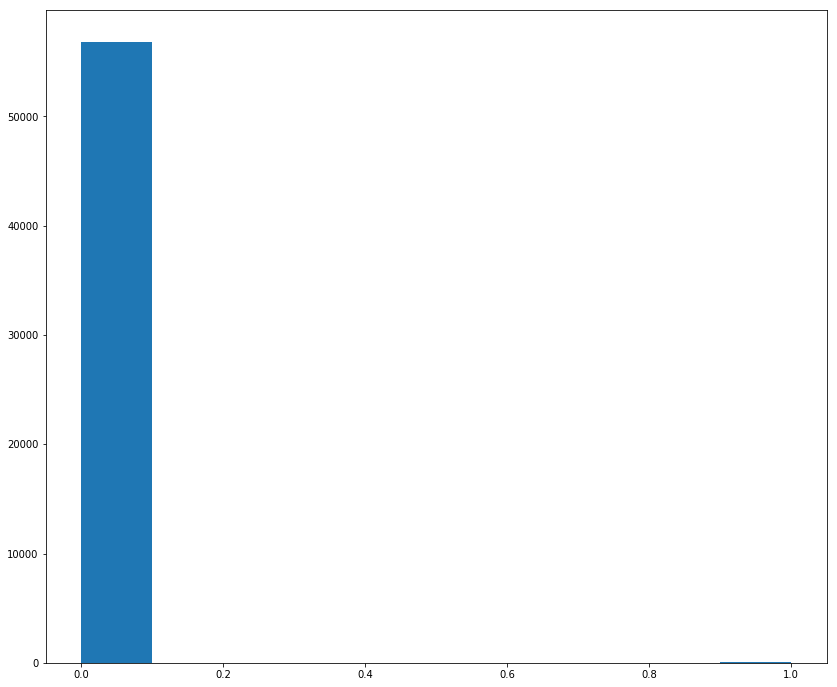

In [67]:
plt.rcParams['figure.figsize']=(14,12)
plt.hist(forest_pred_probs);

In [68]:
cm = confusion_matrix(y_test, forest_pred_probs>0.4)

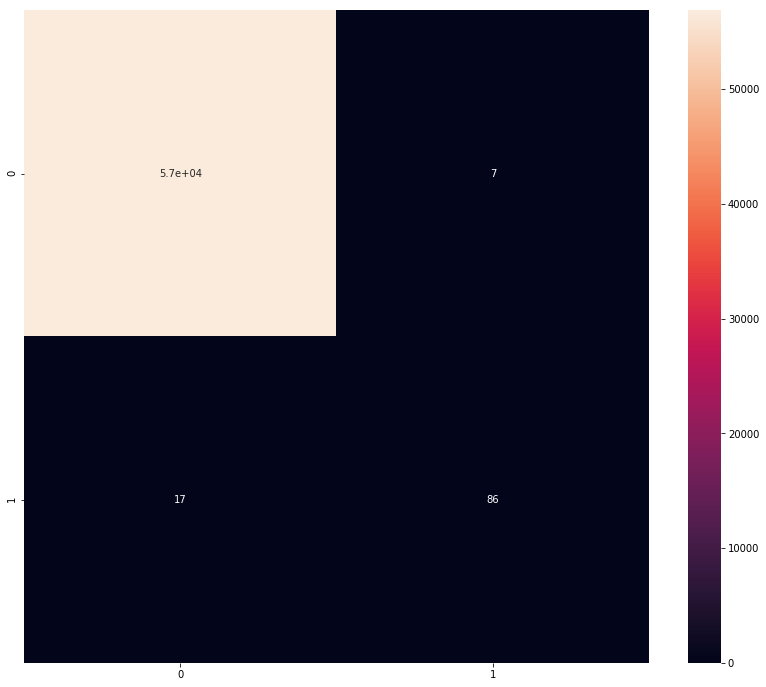

In [69]:
sns.heatmap(cm, annot = True)

In [70]:
print(cm)

[[56852     7]
 [   17    86]]


In [71]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(forest_pred_probs,y_test))

0.00038691759418559734
